# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but we do have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020) (whenever COVID isn't ruining things, at least).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [281]:
import pandas as pd
df=pd.read_excel ("KyotoFullFlower7.xls", skiprows= 25, na_values=[0, '-'])

## 1. Read in the file using pandas, and look at the first five rows

In [282]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.


* **TIP:** Look at the documentation for `read_excel` and `read_csv` to see if there's anything that allows you to skip rows*
* **TIP:** The first year should be 801 AD, and it should not have any dates or anything.

In [283]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 3. Look at a random selection of 10 rows of data

In [284]:
df.sample(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
682,1483,101.0,411.0,3.0,2.0,OYUDONONO-UENO-NIKKI
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
276,1077,NaN,NaN,NaN,NaN,NaN
1130,1931,105.0,415.0,4.0,NaN,NEWS-PAPER(ARASHIYAMA)
702,1503,108.0,418.0,3.0,2.0,SANETAKA-KOKI
29,830,NaN,NaN,NaN,NaN,NaN
533,1334,NaN,NaN,NaN,NaN,NaN
238,1039,NaN,NaN,NaN,NaN,NaN
351,1152,NaN,NaN,NaN,NaN,NaN
280,1081,NaN,NaN,NaN,NaN,NaN


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [285]:
df.sample(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1043,1844,106.0,415.0,4.0,2.0,SANEAKIRA-KYOKI
164,965,104.0,414.0,1.0,2.0,NIHONKIRYAKU
583,1384,98.0,407.0,3.0,2.0,KUGE-NICHIYO-KUFU-RYAKUSHU
528,1329,112.0,422.0,7.0,9.0,EST-from-KJ(SHOKA-WAKASHU)
429,1230,102.0,412.0,1.0,1.0,MEIGETSUKI
726,1527,105.0,415.0,1.0,2.0,NISUIKI
236,1037,NaN,NaN,NaN,NaN,NaN
130,931,NaN,NaN,NaN,NaN,NaN
766,1567,108.0,418.0,3.0,2.0,OYUDONONO-UENO-NIKKI
331,1132,NaN,NaN,NaN,NaN,NaN


In [286]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.lower().str.replace("-", "_")
df.columns = df.columns.str.lower().str.replace("(doy)", "doy")
df.columns


/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/ipykernel_40636/3902243009.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace("(doy)", "doy")


Index(['ad', 'full_flowering_date_(doy)', 'full_flowering_date', 'source_code',
       'data_type_code', 'reference_name'],
      dtype='object')

In [287]:
df.sample(10)

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name
1082,1883,107.0,417.0,3.0,2.0,SUGIURAKE-NIKKI
386,1187,104.0,414.0,4.0,2.0,SAKURAE-RUIJU
592,1393,NaN,NaN,NaN,NaN,NaN
970,1771,104.0,414.0,4.0,2.0,(SHIRYO-KOHON)
448,1249,108.0,418.0,3.0,2.0,BENN-NO-NAISHI-NIKKI
305,1106,NaN,NaN,NaN,NaN,NaN
132,933,106.0,416.0,5.0,8.0,EST-from-WF(SHIRYO-SORAN)
679,1480,104.0,413.0,4.0,3.0,OYUDONONO-UENO-NIKKI [EDA]
60,861,NaN,NaN,NaN,NaN,NaN
146,947,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [288]:
df.source_code.value_counts()

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     17
6.0      9
8.0      5
Name: source_code, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [289]:
df.keys()
df['full_flowering_date_(doy)'].isna()
df=df.dropna(subset=['full_flowering_date_(doy)'])
df.sample(10)

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name
1203,2004,92.0,401.0,4.0,NaN,NEWS-PAPER(ARASHIYAMA)
203,1004,117.0,426.0,3.0,2.0,MIDO-KAMPAKUKI
736,1537,108.0,418.0,4.0,3.0,OYUDONONO-UENO-NIKKI [EDA]
913,1714,108.0,418.0,3.0,1.0,MYOHOIN-HINAMIKI
687,1488,103.0,412.0,3.0,1.0,OYUDONONO-UENO-NIKKI
738,1539,120.0,430.0,4.0,3.0,OYUDONONO-UENO-NIKKI [EDA]
759,1560,100.0,409.0,2.0,2.0,DAINIHON-SHIRYO
467,1268,103.0,412.0,6.0,4.0,TAMEIE-SHU
882,1683,108.0,418.0,3.0,2.0,ITO-JINSAI-NIKKI
1209,2010,95.0,405.0,7.0,NaN,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

<AxesSubplot: >

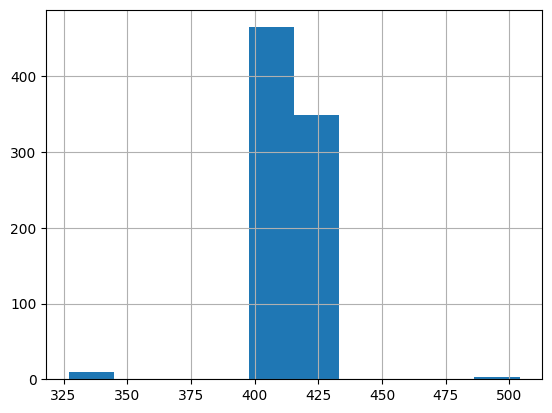

In [290]:
df.full_flowering_date.hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot: >

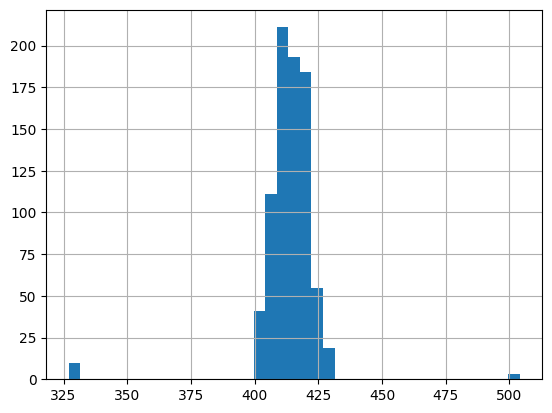

In [291]:
df.full_flowering_date.hist(bins=39)

## 9a. What's the average number of days it takes for the flowers to blossom? 

In [292]:
df['full_flowering_date_(doy)'].median()

#105 days 

105.0

## 9b. And how many records do we have?

You can actually answer this one and the last one with a single line of code.

In [293]:
df.shape
#827 records

(827, 6)

## 10. How many days into the year did cherry flowers normally blossom before 1900?



In [294]:
before_1900_df = df[df.ad < 1900]
before_1900_df.head()
before_1900_df['full_flowering_date_(doy)'].median()

105.0

## 11. How about after 1900?

In [295]:
after_1900_df = df[df.ad > 1900]
after_1900_df.head()
after_1900_df['full_flowering_date_(doy)'].median()

99.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [296]:
df.source_code.value_counts()

#250 times 

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     17
6.0      9
8.0      5
Name: source_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [297]:
df[df.source_code == 4.0].head()

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name
149,950,95.0,405.0,4.0,2.0,DAINIHON-SHIRYO
178,979,104.0,414.0,4.0,3.0,DAINIHON-SHIRYO
184,985,94.0,404.0,4.0,2.0,SHOYUKI
188,989,100.0,410.0,4.0,2.0,SHOYUKI
218,1019,98.0,408.0,4.0,2.0,SHOYUKI


In [355]:
df.dtypes

ad                                  int64
full_flowering_date_doy           float64
full_flowering_date               float64
source_code                       float64
data_type_code                    float64
reference_name                     object
month                              object
day_of_month                       object
fulldate                   datetime64[ns]
date                               object
dtype: object

In [299]:
df.columns = df.columns.str.replace("(doy)","doy", regex=False)

## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot: >

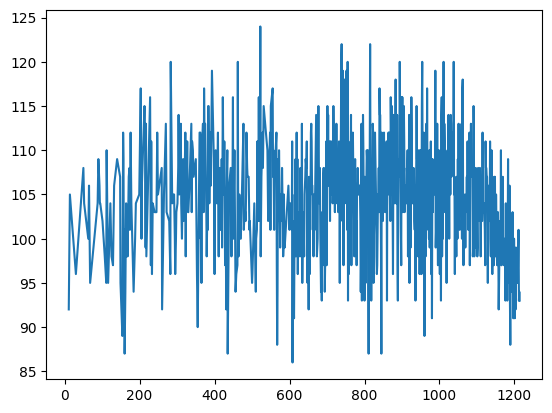

In [300]:
df.full_flowering_date_doy.plot()

#Is there a way to say like '500Y' so I see beyond 1900? I tried but it didn't work...

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

```python
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()
```

In this case we're only looking at the final 5. You'll probably want to look at more!

<AxesSubplot: >

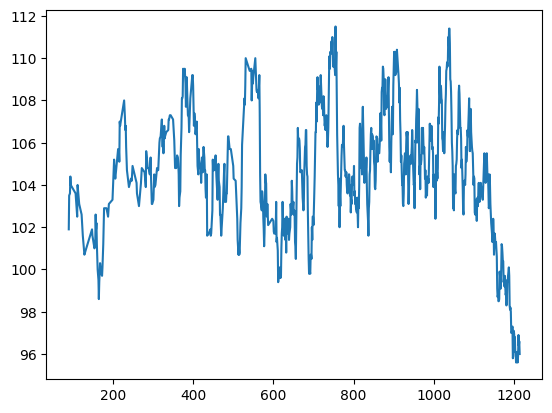

In [301]:
df.rolling(10, on='ad', min_periods=10).full_flowering_date_doy.mean().plot()

In [302]:
rolling_date = df.rolling(10, on='ad', min_periods=10).full_flowering_date_doy.mean()

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

<AxesSubplot: >

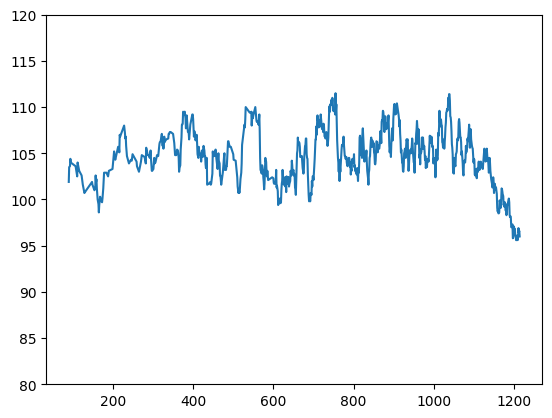

In [303]:
rolling_date.plot(ylim=(80,120))

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime` pandas tries to figure out the date format automatically. If that doesn't work, you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values.
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [314]:
df.head(2)

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,4,401
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,4,415


In [354]:
df['month'] = pd.to_datetime(df.full_flowering_date, format="%m%d", errors='coerce').dt.strftime('%B')
df['fulldate'] = pd.to_datetime(df.full_flowering_date, format="%m%d", errors='coerce')
df.dtypes

ad                                  int64
full_flowering_date_doy           float64
full_flowering_date               float64
source_code                       float64
data_type_code                    float64
reference_name                     object
month                              object
day_of_month                       object
fulldate                   datetime64[ns]
date                               object
dtype: object

In [353]:
df.head(2)

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,month,day_of_month,fulldate,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April,01,1900-04-01,01-April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April,15,1900-04-15,15-April


In [307]:
df.loc[df.full_flowering_date < 400, 'month'] = 'March'
df.loc[df.full_flowering_date >400, 'month'] = 'April'
df.loc[df.full_flowering_date > 500, 'month'] = 'May'
df.dtypes

#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

ad                           int64
full_flowering_date_doy    float64
full_flowering_date        float64
source_code                float64
data_type_code             float64
reference_name              object
month                       object
dtype: object

### 17. Using your new column, how many blossomings happened in each month?

In [308]:
df.head(30)

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,April


### 18. Graph how many blossomings happened in each month.

<AxesSubplot: >

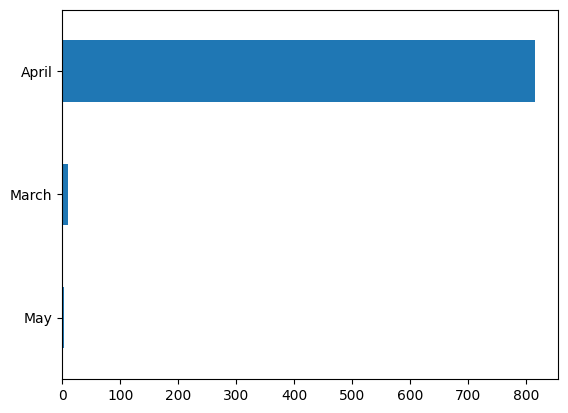

In [309]:
df.month.value_counts().sort_values().plot(kind="barh")

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` Depending on what you did above, it might be a little tougher since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [340]:
df.head(2)
df.dtypes

ad                                  int64
full_flowering_date_doy           float64
full_flowering_date               float64
source_code                       float64
data_type_code                    float64
reference_name                     object
month                              object
day_of_month                       object
fulldate                   datetime64[ns]
dtype: object

In [337]:
df['day_of_month'] = pd.to_datetime(df.fulldate, format="%y-%m-%d", errors='coerce').dt.strftime('%d')
df.head(2)

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,month,day_of_month,fulldate
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April,01,1900-04-01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April,15,1900-04-15


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new string-like column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above, or *just totally skip this one if you have an actual datetime column*.

In [346]:
#df.month.str+df.day_of_month.str.astype(str)
df.day_of_month.astype(str)+df.month.astype(str)

11      01April
14      15April
30      06April
50      18April
52      14April
         ...   
1210    09April
1211    10April
1212    03April
1213    04April
1214    03April
Length: 827, dtype: object

In [351]:
df['date'] = df.day_of_month.astype(str)+"-"+df.month.astype(str)
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,month,day_of_month,fulldate,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April,01,1900-04-01,01-April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April,15,1900-04-15,15-April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April,06,1900-04-06,06-April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,18,1900-04-18,18-April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,14,1900-04-14,14-April


# YOU ARE DONE.

And **incredible.**